<a href="https://colab.research.google.com/github/HammadN98/Estudos-de-caso/blob/main/regressao_Estudo_de_caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy

**Objetivo:** Prever a expectativa de vida de países com base em indicadores sociais, econômicos e de saúde.

Dados obtidos em: [Life Expectancy](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)

## 0. Importacoes

In [2]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dados = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Estudos-de-caso/refs/heads/main/Dados/Life-Expectancy-Data-Updated.csv")

## 1. Informacoes iniciais

In [4]:
dados.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

In [5]:
todas_columns = dados.columns
todas_columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [6]:
dados.info()
#Apriori sem valores null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [7]:
dados.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

## 2. Tratamento dos dados

* Verificar a existencia de valores nulos e outliers

In [8]:
dados.isnull().sum().sum()

0

Nao existem valores nulos no dataset

In [10]:
num_columns = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns

['Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Life_expectancy']

### 2.1 Analisando a distribuicao dos dados por variavel

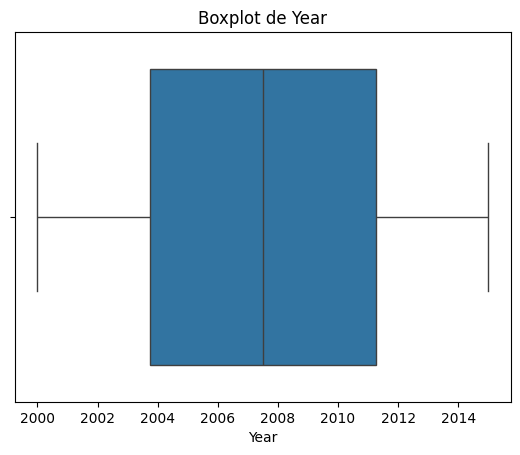

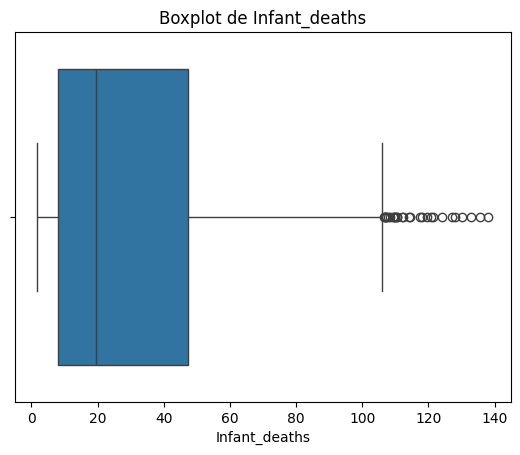

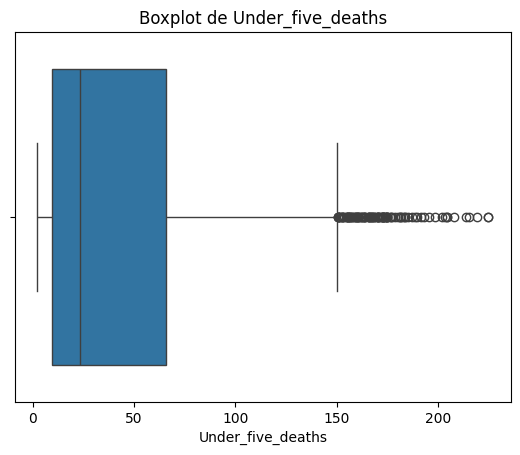

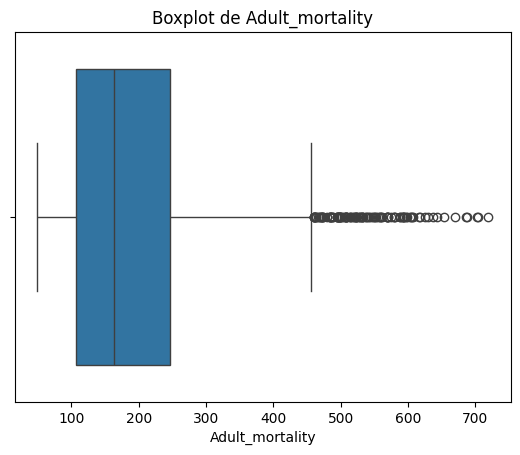

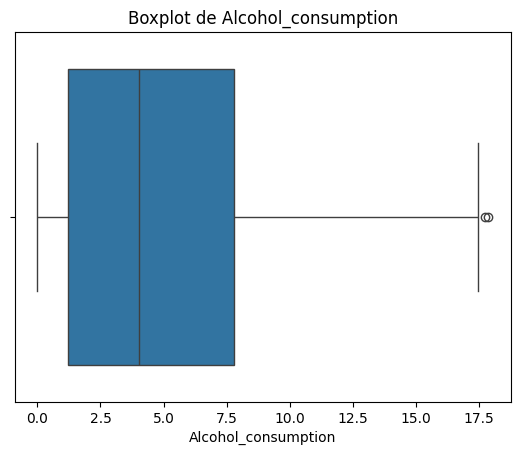

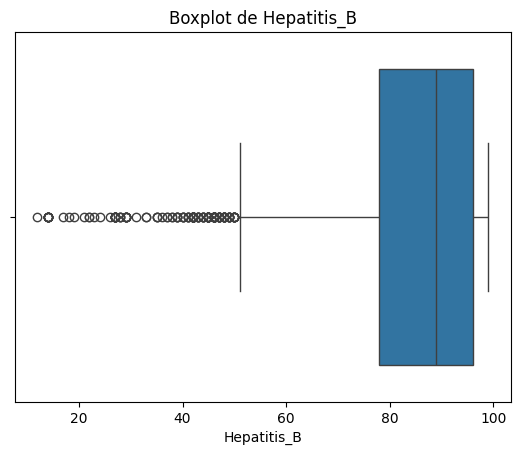

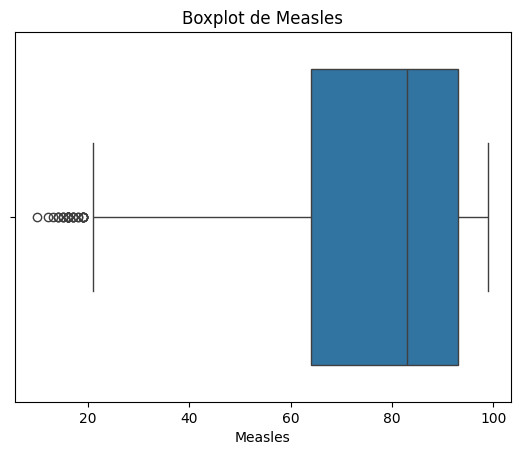

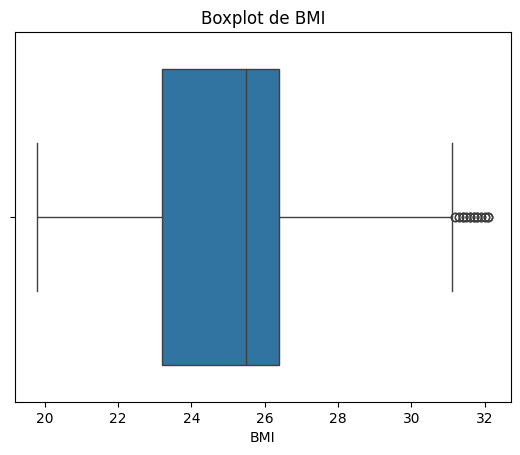

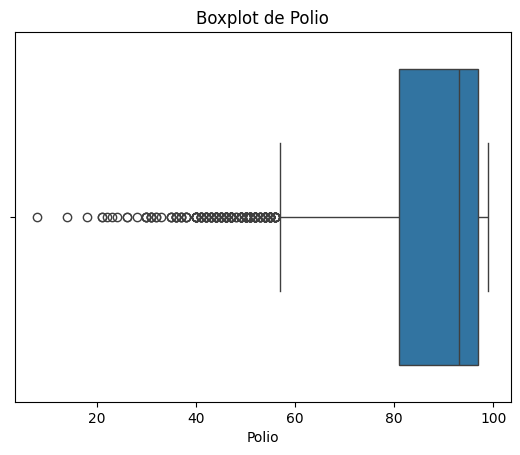

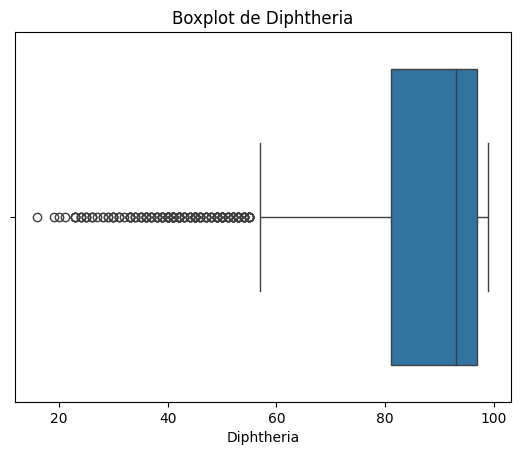

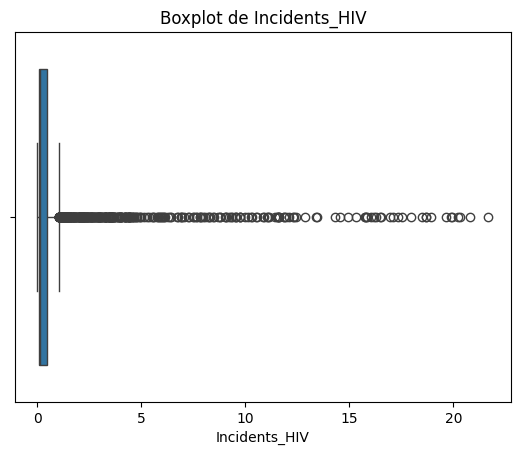

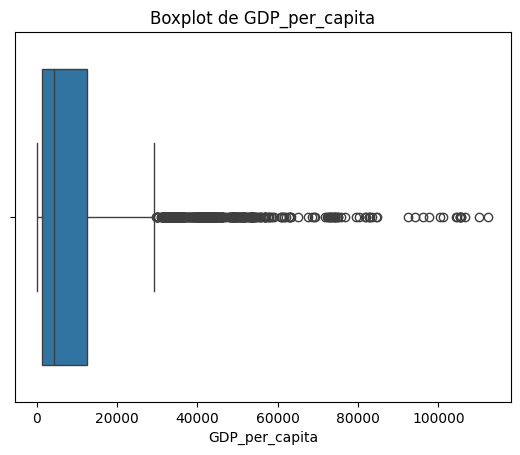

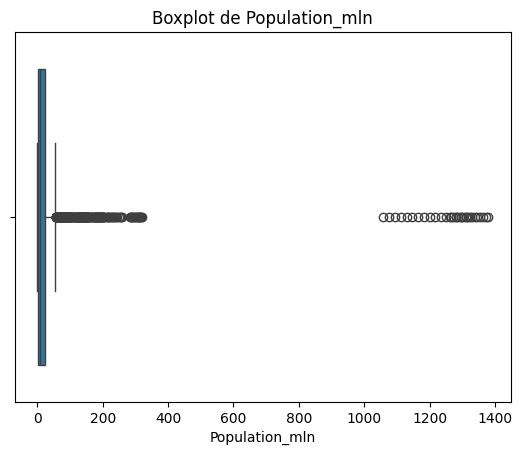

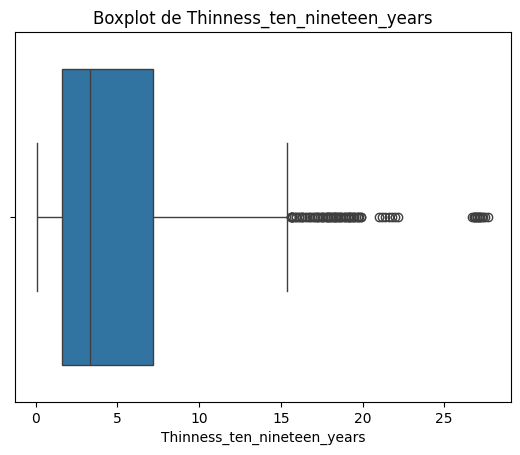

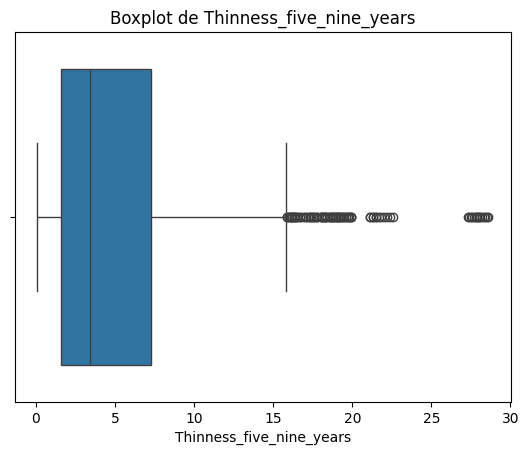

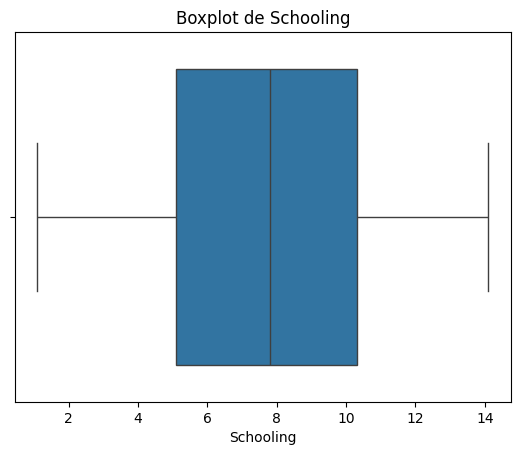

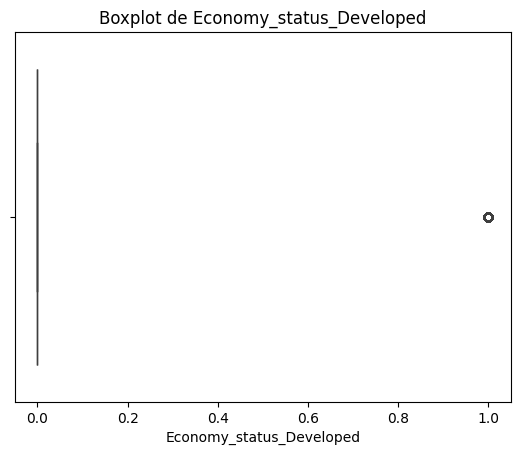

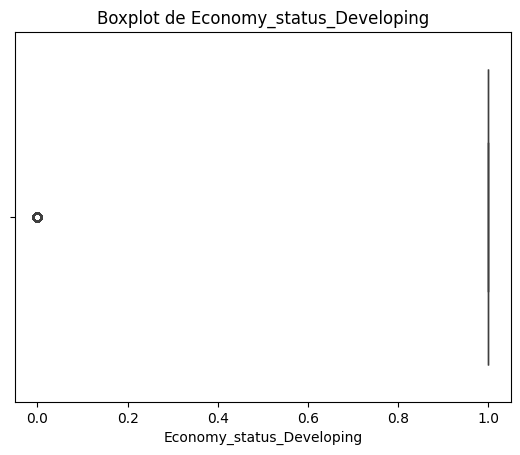

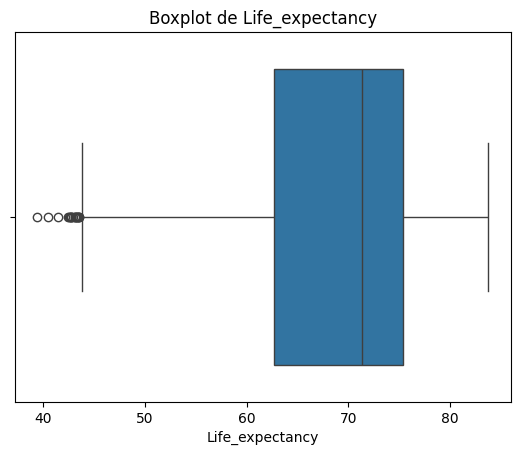

In [11]:
for column in num_columns:
  sns.boxplot(x=dados[column])
  plt.title(f"Boxplot de {column}")
  plt.xlabel(f"{column}")
  plt.show()

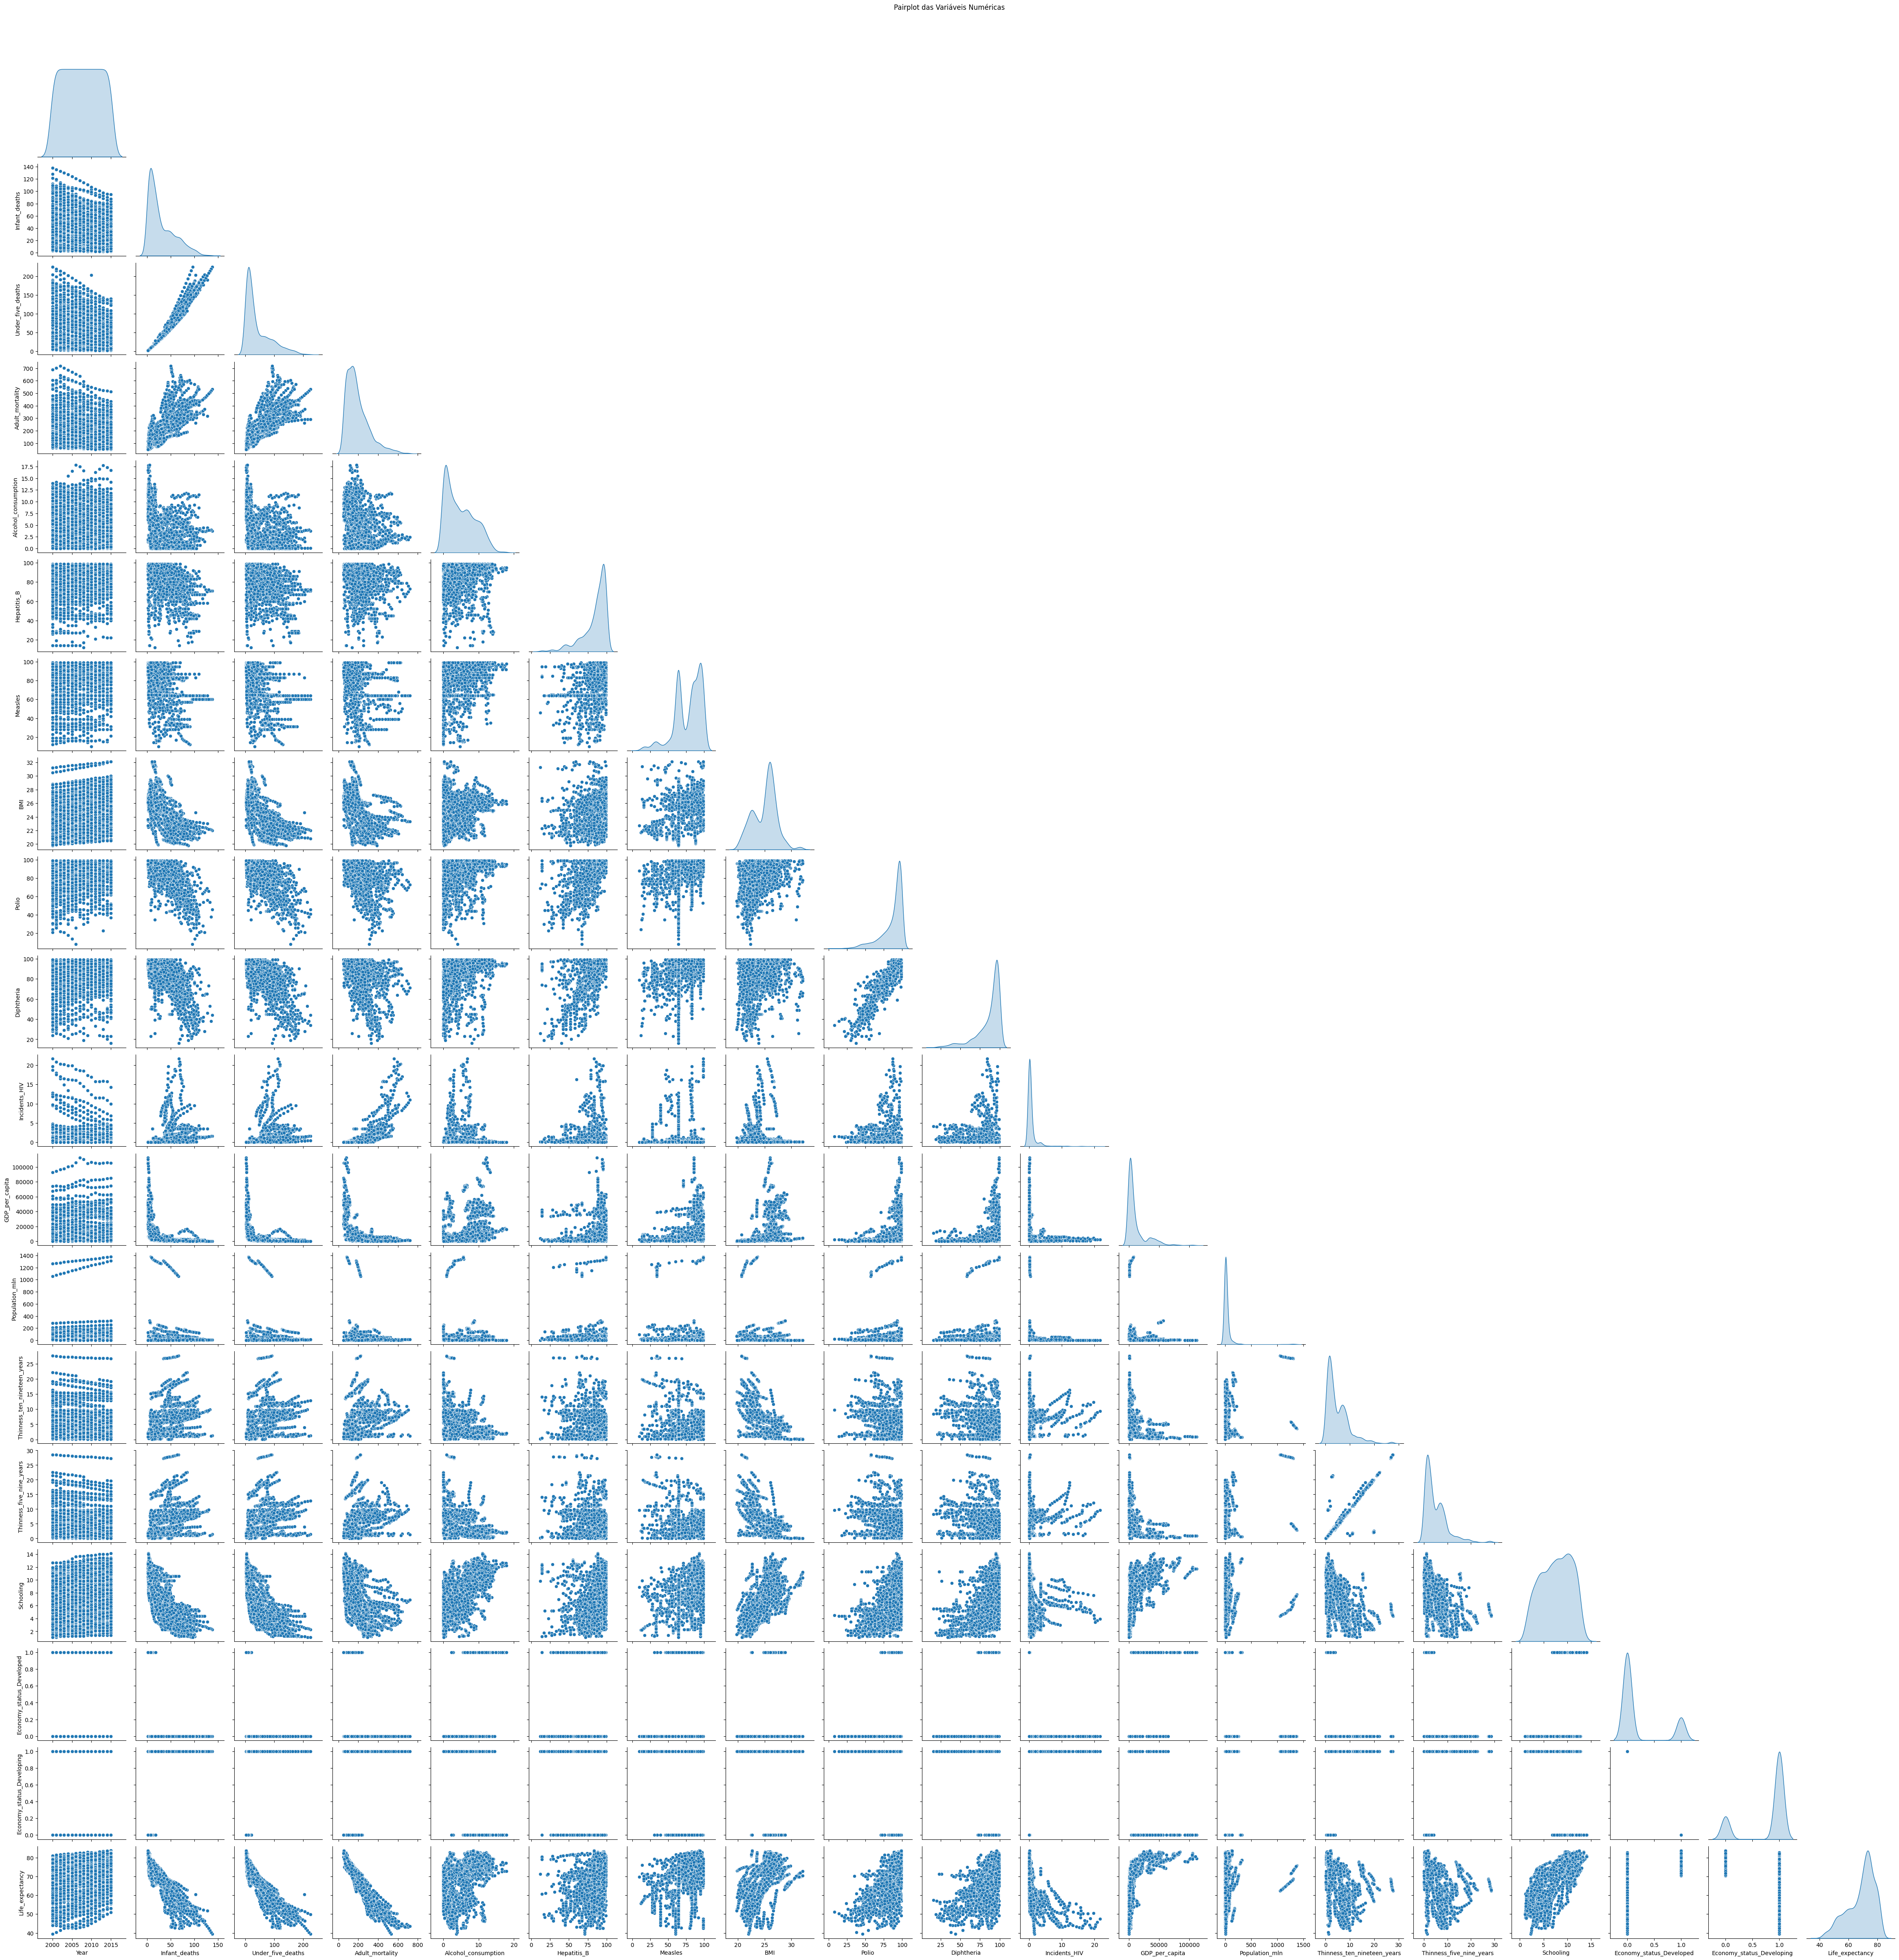

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar as colunas numéricas
num_columns = dados.select_dtypes(include=['float64', 'int64']).columns

# Criar o pairplot
pairplot = sns.pairplot(dados[num_columns], diag_kind='kde', corner=True)

# Ajustar layout
pairplot.fig.suptitle("Pairplot das Variáveis Numéricas", y=1.02)  # Título para o gráfico
plt.show()


In [ ]:
pairplot = sns.pairplot(dados, diag_kind='kde', hue='Region')


### 2.2 Matriz de correlacao

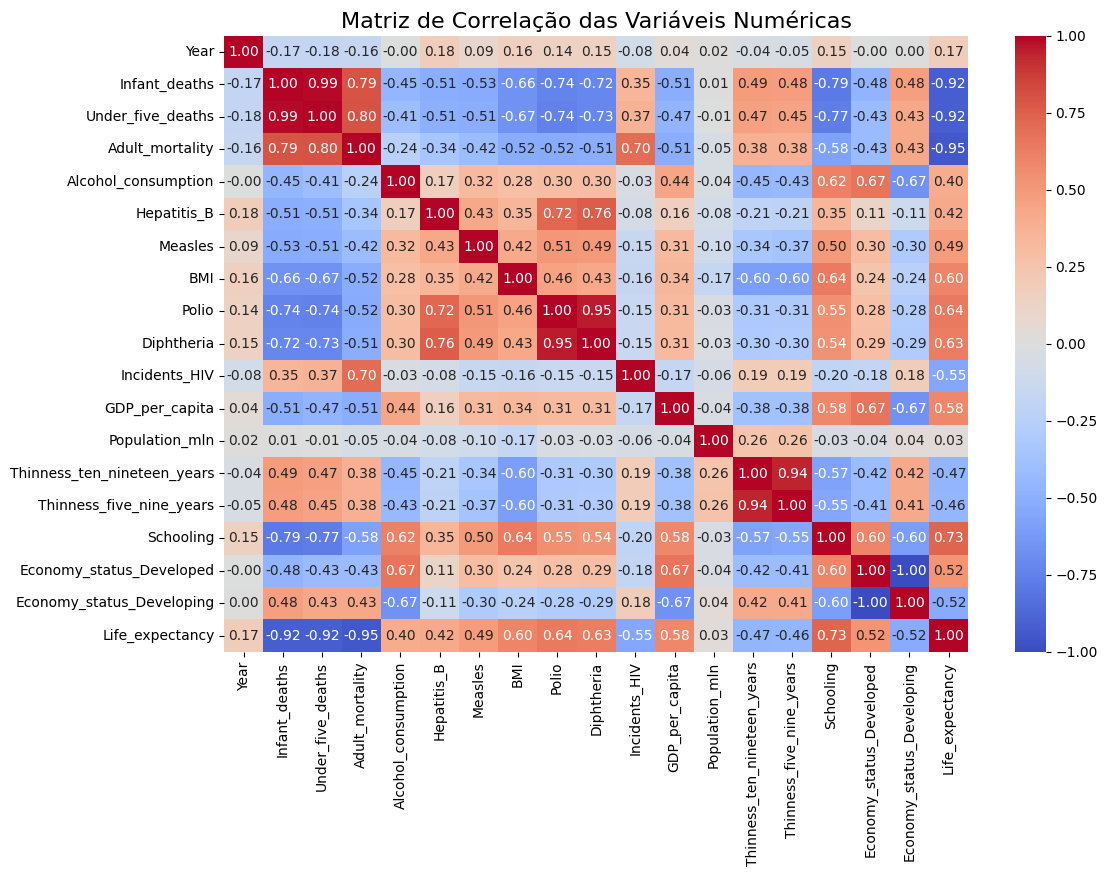

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação das variáveis numéricas
correlation_matrix = dados[num_columns].corr()

# Criar o heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()


### 2.3 VIF: Variance Inflation Factor

Para calcular o quanto a variancia de um coeficiente aumenta devido a multicolinearidade.

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dados_numericos = dados[num_columns]

dados_numericos = sm.add_constant(dados_numericos)

vif = pd.DataFrame()
vif["Variável"] = dados_numericos.columns
vif["VIF"] = [variance_inflation_factor(dados_numericos.values, i) for i in range(dados_numericos.shape[1])]

vif = vif[vif["Variável"] != "const"]

print(vif)


                       Variável        VIF
1                          Year   1.078552
2                 Infant_deaths  45.709355
3             Under_five_deaths  48.751498
4               Adult_mortality  24.626360
5           Alcohol_consumption   2.452190
6                   Hepatitis_B   2.626118
7                       Measles   1.589564
8                           BMI   2.792159
9                         Polio  12.020573
10                   Diphtheria  13.001387
11                Incidents_HIV   2.926685
12               GDP_per_capita   2.429123
13               Population_mln   1.152280
14  Thinness_ten_nineteen_years   8.971444
15     Thinness_five_nine_years   8.958778
16                    Schooling   4.477625
17     Economy_status_Developed        inf
18    Economy_status_Developing        inf
19              Life_expectancy  48.340872


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 2.4 Remocao das variaveis redundantes

In [23]:
dados_sem_redundancia = dados.drop(columns=['Under_five_deaths', 'Diphtheria', 'Economy_status_Developing'])
colunas_sem_redundancia = dados_sem_redundancia.columns

In [24]:
dados_numericos2 = dados_sem_redundancia[colunas_sem_redundancia]

# add contante
dados_numericos = sm.add_constant(dados_numericos2)

vif = pd.DataFrame()
vif["Variável"] = dados_numericos2.columns
vif["VIF"] = [variance_inflation_factor(dados_numericos2.values, i) for i in range(dados_numericos2.shape[1])]

vif = vif[vif["Variável"] != "const"]

print(vif) #Era p funcionar

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''